<a href="https://colab.research.google.com/github/Abdelhak-mekaoui/KMeans_implementation/blob/main/KMeans_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans

**Importing the libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
class myKMeans():
  def __init__(self,n_clusters=100,max_iters=10):
    self.n_clusters=n_clusters
    self.centroids=np.zeros(n_clusters)
    self.max_iters=10
    
  #Calcul of the square of the euclidian distance  between 
  #two arrays
  @staticmethod
  def sqr_euc_distance(x,y):#x,y (nd arrays)
    assert x.shape==y.shape
    n=len(x)
    d=0
    for i in range(n):
      d+=(x[i]-y[i])**2
    return d 

  def closets_centroids(self,X):
    m,n=X.shape
    indexes=np.zeros(m,dtype=int)
    for i in range(m):
      D=[self.sqr_euc_distance(X[i,:],c) for c in self.centroids]
      indexes[i]=np.argmin(D)
    return indexes

  def update_centroids(self,X,idx):
    m,n=X.shape
    K=self.n_clusters
    new = np.zeros((K,n))
    for k in range(K):
      pt_c = X[idx==k,:]
      c=np.mean(pt_c,axis=0)

  def fit(self,X):
    n,m=X.shape
    randidx = np.random.permutation(X.shape[0])
    self.centroids = X[randidx[:5]]
    for _ in range(self.max_iters):
      idx=self.closets_centroids(X)
      self.update_centroids(X,idx)
  
  def predict(self,X):
    idx=self.closets_centroids(X)
    return idx



**Testing**

In [74]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [75]:
kmeans = myKMeans(n_clusters = 5)
kmeans.fit(X)


In [76]:
y_kmeans = kmeans.predict(X)

In [77]:
y.shape

(200,)

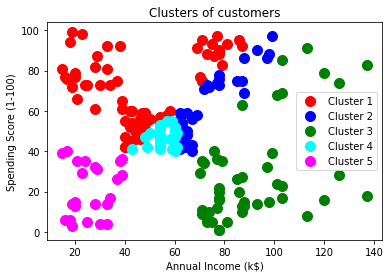

In [78]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()